In [21]:
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [28]:
# Step 0: Define Constants
NUM_CLASSES = 4781
HEIGHT, WIDTH = 1024, 1024
BASE_DIR = '/home/harris/Projects/ML/Datasets/Kuzushiji-Recognition'

In [23]:
# Step 1: Load the data
with open('data/dtrain_crop.pkl', 'rb') as file:
    train = pickle.load(file)

with open('data/dval_crop.pkl', 'rb') as file:
    val = pickle.load(file)

def preprocess_data(item):
    # Extract bounding boxes and labels
    bboxes = item['ann']['bboxes']
    labels = item['ann']['labels']
    

    return (bboxes, labels)

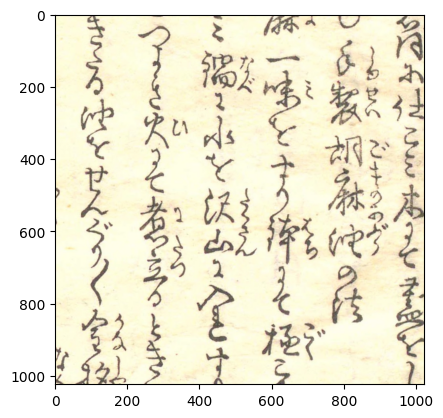

1024
1024


In [35]:
import matplotlib.pyplot as plt
from PIL import Image

i = 5

image = Image.open(BASE_DIR + '/train_images_crop/' + train[i]['filename'])
plt.imshow(image)
plt.show()

print(train[i]['height'])
print(train[i]['width'])

In [20]:
print(train[0]['ann']['bboxes'])
print(train[0]['ann']['labels'])
print(train[0]['filename'])

37
37


In [4]:
# Step 2 & 3: Preprocess and convert to TensorFlow Dataset
training_dataset = tf.data.Dataset.from_generator(
    lambda: (preprocess_data(item) for item in train),
    output_types=(tf.float32, (tf.float32, tf.int32))
)

training_dataset = training_dataset.batch(32)  # Batch size can be adjusted

Instructions for updating:
Use output_signature instead


2024-02-01 11:00:20.788728: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-01 11:00:20.820460: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-01 11:00:20.820637: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
# Take one batch from the training dataset
for image_batch, label_batch in training_dataset.take(1):
    print(type(image_batch), type(label_batch))

2024-02-01 11:05:31.524417: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, (tf.float32, tf.int32)), but the yielded element was (array([[ 931.,  538.,  963.,  566.],
       [ 404.,  828.,  503.,  856.],
       [ 539.,  661.,  585.,  698.],
       [ 918.,  955.,  942.,  996.],
       [ 544.,  532.,  586.,  578.],
       [ 434.,  338.,  490.,  384.],
       [ 637.,  119.,  719.,  165.],
       [ 413.,  620.,  481.,  670.],
       [ 548.,  592.,  591.,  643.],
       [ 433.,  400.,  506.,  460.],
       [ 171.,  264.,  273.,  327.],
       [ 182.,  361.,  229.,  425.],
       [ 666.,  321.,  715.,  390.],
       [ 895.,  584.,  982.,  656.],
       [ 176.,  187.,  235.,  260.],
       [ 752.,   87.,  862.,  161.],
       [ 449.,  441.,  490.,  521.],
       [ 889.,  205.,  988.,  288.],
       [ 896.,  321.,  977.,  405.],
       [ 879.,  822.,  97

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_3_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, (tf.float32, tf.int32)), but the yielded element was (array([[ 931.,  538.,  963.,  566.],
       [ 404.,  828.,  503.,  856.],
       [ 539.,  661.,  585.,  698.],
       [ 918.,  955.,  942.,  996.],
       [ 544.,  532.,  586.,  578.],
       [ 434.,  338.,  490.,  384.],
       [ 637.,  119.,  719.,  165.],
       [ 413.,  620.,  481.,  670.],
       [ 548.,  592.,  591.,  643.],
       [ 433.,  400.,  506.,  460.],
       [ 171.,  264.,  273.,  327.],
       [ 182.,  361.,  229.,  425.],
       [ 666.,  321.,  715.,  390.],
       [ 895.,  584.,  982.,  656.],
       [ 176.,  187.,  235.,  260.],
       [ 752.,   87.,  862.,  161.],
       [ 449.,  441.,  490.,  521.],
       [ 889.,  205.,  988.,  288.],
       [ 896.,  321.,  977.,  405.],
       [ 879.,  822.,  977.,  907.],
       [ 411.,  243.,  493.,  333.],
       [ 646.,    9.,  722.,  103.],
       [ 773.,  930.,  867., 1024.],
       [ 423.,    2.,  482.,   98.],
       [ 425.,  110.,  474.,  208.],
       [ 891.,  692.,  974.,  794.],
       [ 450.,  512.,  470.,  615.],
       [ 765.,  640.,  853.,  744.],
       [ 514.,  727.,  627.,  831.],
       [ 162.,   43.,  235.,  154.],
       [ 906.,   66.,  960.,  178.],
       [ 415.,  666.,  494.,  782.],
       [ 409.,  927.,  526., 1024.],
       [ 760.,  474.,  861.,  595.],
       [ 770.,  183.,  846.,  307.],
       [ 919.,  415.,  966.,  540.],
       [ 773.,  770.,  852.,  899.],
       [ 812.,  306.,  827.,  456.],
       [ 699.,  123.,  715.,  316.]], dtype=float32), array([  89,  247,  249,   57,  303,   73,   57,   92,  643,   92,  286,
       1811,   65,  255, 1346,   99,   86, 1428,  326,   91,  342, 2862,
       2256,   88,   77,  686,   69,  575, 4755, 1880,   84, 1857, 3376,
       1832,  102, 2599, 1374,   69,   69])).
Traceback (most recent call last):

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/data/util/nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1542, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1571, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1445, in _tf_data_assert_shallow_structure
    _tf_data_assert_shallow_structure(

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1415, in _tf_data_assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: 'ndarray'.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, (tf.float32, tf.int32)), but the yielded element was (array([[ 931.,  538.,  963.,  566.],
       [ 404.,  828.,  503.,  856.],
       [ 539.,  661.,  585.,  698.],
       [ 918.,  955.,  942.,  996.],
       [ 544.,  532.,  586.,  578.],
       [ 434.,  338.,  490.,  384.],
       [ 637.,  119.,  719.,  165.],
       [ 413.,  620.,  481.,  670.],
       [ 548.,  592.,  591.,  643.],
       [ 433.,  400.,  506.,  460.],
       [ 171.,  264.,  273.,  327.],
       [ 182.,  361.,  229.,  425.],
       [ 666.,  321.,  715.,  390.],
       [ 895.,  584.,  982.,  656.],
       [ 176.,  187.,  235.,  260.],
       [ 752.,   87.,  862.,  161.],
       [ 449.,  441.,  490.,  521.],
       [ 889.,  205.,  988.,  288.],
       [ 896.,  321.,  977.,  405.],
       [ 879.,  822.,  977.,  907.],
       [ 411.,  243.,  493.,  333.],
       [ 646.,    9.,  722.,  103.],
       [ 773.,  930.,  867., 1024.],
       [ 423.,    2.,  482.,   98.],
       [ 425.,  110.,  474.,  208.],
       [ 891.,  692.,  974.,  794.],
       [ 450.,  512.,  470.,  615.],
       [ 765.,  640.,  853.,  744.],
       [ 514.,  727.,  627.,  831.],
       [ 162.,   43.,  235.,  154.],
       [ 906.,   66.,  960.,  178.],
       [ 415.,  666.,  494.,  782.],
       [ 409.,  927.,  526., 1024.],
       [ 760.,  474.,  861.,  595.],
       [ 770.,  183.,  846.,  307.],
       [ 919.,  415.,  966.,  540.],
       [ 773.,  770.,  852.,  899.],
       [ 812.,  306.,  827.,  456.],
       [ 699.,  123.,  715.,  316.]], dtype=float32), array([  89,  247,  249,   57,  303,   73,   57,   92,  643,   92,  286,
       1811,   65,  255, 1346,   99,   86, 1428,  326,   91,  342, 2862,
       2256,   88,   77,  686,   69,  575, 4755, 1880,   84, 1857, 3376,
       1832,  102, 2599, 1374,   69,   69])).


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

7, 3376,   71, 1832,
        102, 2599, 1374,   69])).
Traceback (most recent call last):

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/data/util/nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1542, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)

  File "/home/harris/Projects/ML/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/.venv/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line

In [7]:
training_dataset

<_BatchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None)))>

In [ ]:
# Step 4: Define model
base_model = ConvNeXtBase(include_top=False)

# Freeze base
base_model.trainable = False

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.resize(HEIGHT, WIDTH),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.normalize_image(),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
# Add Custom layers
inputs = tf.keras.Input(shape=())
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

base_model.summary()

# Step 4: Define the model
# Assuming you are using a prebuilt model from TensorFlow's Model Garden
# model = ...

# Step 5: Train the model
# model.compile(...)
# model.fit(dataset, epochs=10)